In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Reading the dataset in pandas
df_liver = pd.read_csv('/content/gdrive/MyDrive/indian_liver_patient.csv')

In [ ]:
# Accessing the first 5 rows of df_liver
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Accessing the last 5 rows of df_liver
df_liver.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
# Retrieving the colunmn information
df_liver.columns.values

array(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'], dtype=object)

In [ ]:
# Find the shape of the datframe df_liver
df_liver.shape

(583, 11)

In [ ]:
print ('Total Unhealthy Livers : {} '.format(df_liver.Dataset.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df_liver.Dataset.value_counts()[2]))

Total Unhealthy Livers : 416 
Total Healthy Livers : 167 


<ipython-input-29-8e49f876e84c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


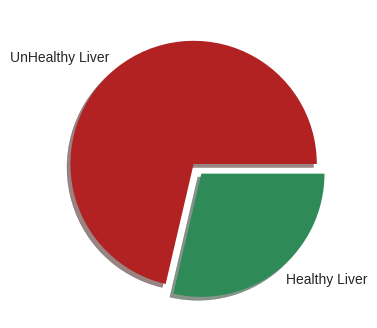

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(4,4))

plt.pie(x=df_liver["Dataset"].value_counts(),
        colors=["firebrick","seagreen"],
        labels=["UnHealthy Liver","Healthy Liver"],
        shadow = True,
        explode = (0, 0.1)
        )

plt.show()

In [ ]:
# Some simple statistical inferences to get a good feel of the data
df_liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
# Defining a function that allows us to create a table of missing values in df_liver and their percentages in descending order
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [ ]:
# Find the total count and % of missing values
missing_values(df_liver)

,Total,%
Albumin_and_Globulin_Ratio,4,1.0
Age,0,0.0
Gender,0,0.0
Total_Bilirubin,0,0.0
Direct_Bilirubin,0,0.0
Alkaline_Phosphotase,0,0.0
Alamine_Aminotransferase,0,0.0
Aspartate_Aminotransferase,0,0.0
Total_Protiens,0,0.0
Albumin,0,0.0


In [ ]:
# Replacing missing values with the mean of feature column Albumin_and_Globulin_Ratio,
# then check to see that it has been successfull, where the sum of missig values should be 0
df_liver['Albumin_and_Globulin_Ratio'].fillna(df_liver['Albumin_and_Globulin_Ratio'].mean(), inplace = True)
df_liver['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [ ]:
missing_values(df_liver)

,Total,%
Age,0,0.0
Gender,0,0.0
Total_Bilirubin,0,0.0
Direct_Bilirubin,0,0.0
Alkaline_Phosphotase,0,0.0
Alamine_Aminotransferase,0,0.0
Aspartate_Aminotransferase,0,0.0
Total_Protiens,0,0.0
Albumin,0,0.0
Albumin_and_Globulin_Ratio,0,0.0


In [ ]:
# Changing the current categorical feature Gender to a numerical feature of 0 or 1
df_liver['Gender'] = df_liver['Gender'].map({'Male': 1, 'Female': 0})
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# A new dataframe for the simple hypothesis testing
df_liver_hyp = df_liver
df_liver_hyp.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# New dataframe for the simple hypothesis testing
df_liver_hyp = df_liver
df_liver_hyp.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Creating a 'Hypothesis' column and setting that equal to 0
df_liver_hyp['Hypothesis'] = 0

# Our hypothesis is that if the patients have liver disease then set the hypothesis column to 1
df_liver_hyp.loc[df_liver_hyp['Dataset'] == 1, 'Hypothesis'] = 1

# Next, to check if our hypothesis is correct we will create another column called Result and set that equal to 0
df_liver_hyp['Result'] = 0

# If the Dataset column agrees with our Hypothesis column, I am going to update the 'Result' column by 1.
df_liver_hyp.loc[df_liver_hyp['Dataset'] == df_liver_hyp['Hypothesis'], 'Result'] = 1

df_liver_hyp.head()
# feature extraction

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Hypothesis,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,1


In [ ]:
# finding the percentage of patients that have liver disease
round(df_liver_hyp['Result'].value_counts(normalize=True) * 100, 3)

1    71.355
0    28.645
Name: Result, dtype: float64

In [ ]:
# Machine learning libraries in sklearn

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# K-fold cross validation: randomly splits the training set into (n_splits) 10 distinct subsets called folds,
# then it trains and evaluates the models 10 times, picking a different fold for evaluation every time and
# training on the other 9 folds.
K_fold = StratifiedKFold(n_splits=10)

In [ ]:
# Separate train features and response
X = df_liver.drop(["Dataset", "Hypothesis", "Result"],axis = 1)
Y = df_liver["Dataset"]

# Scaling the data
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

# Creating the Train and Test sets
# Splitting the train and test into 70% training and 30% testing
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,stratify=Y, test_size=0.3,random_state=42)


# Find the shape of all sets
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

<ipython-input-22-414fad1d38db>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,:]=scaled_values


((408, 10), (408,), (175, 10), (175,))

In [ ]:
# Logistic Regression
model_logreg = LogisticRegression()
model_logreg.fit(X_train,Y_train)
y_pred = model_logreg.predict(X_test)

scores = cross_val_score(model_logreg, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_logreg = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_logreg))
acc_logreg = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_logreg))

[0.73170732 0.73170732 0.70731707 0.68292683 0.70731707 0.68292683
 0.70731707 0.73170732 0.725      0.725     ]
Score: 71.329
Accuracy: 72.0


In [ ]:
# K-Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, Y_train)
y_pred = model_knn.predict(X_test)

scores = cross_val_score(model_knn, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_knn = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_knn))
acc_knn = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_knn))

[0.73170732 0.70731707 0.70731707 0.58536585 0.56097561 0.75609756
 0.63414634 0.70731707 0.725      0.6       ]
Score: 67.152
Accuracy: 65.143


In [ ]:
# Random Forest Classifier
model_rfc = RandomForestClassifier(n_estimators=50)
model_rfc.fit(X_train, Y_train)
y_pred = model_rfc.predict(X_test)

scores = cross_val_score(model_rfc, X_train, Y_train, cv=K_fold, n_jobs=4, scoring ='accuracy')

print(scores)
score_rfc = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_rfc))
acc_rfc = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_rfc))

[0.6097561  0.70731707 0.68292683 0.70731707 0.75609756 0.56097561
 0.7804878  0.65853659 0.675      0.75      ]
Score: 68.884
Accuracy: 70.857


In [ ]:
# Support vector classification
model_SVC = SVC()
model_SVC.fit(X_train, Y_train)
y_pred = model_SVC.predict(X_test)

scores = cross_val_score(model_SVC, X_train, Y_train, cv=K_fold, n_jobs=4, scoring='accuracy')

print(scores)
score_SVC = round(np.mean(scores) * 100, 3)
print("Score: {}".format(score_SVC))
acc_SVC = round(np.mean(accuracy_score(Y_test, y_pred)) * 100, 3)
print("Accuracy: {}".format(acc_SVC))

[0.73170732 0.70731707 0.70731707 0.70731707 0.70731707 0.70731707
 0.70731707 0.70731707 0.725      0.725     ]
Score: 71.329
Accuracy: 71.429


In [ ]:
results = pd.DataFrame({'Model': ['Logistic Regression','KNeighborsClassifer','Random Forest Classifier', 'SVC'],
                        'Accuracy': [acc_logreg, acc_knn, acc_rfc, acc_SVC],
                        'Score': [score_logreg, score_knn, score_rfc, score_SVC],})
df_results = results.sort_values(by='Score', ascending=False)
df_results = df_results.set_index('Score')
df_results

,Model,Accuracy
Score,,
71.329,Logistic Regression,72.000
71.329,SVC,71.429
68.884,Random Forest Classifier,70.857
67.152,KNeighborsClassifer,65.143


<ipython-input-31-a13c39730fab>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


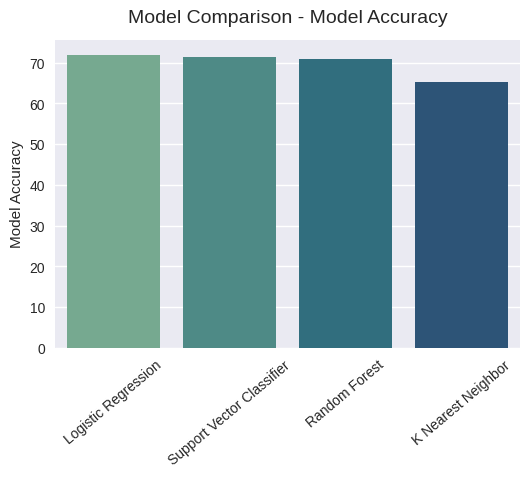

In [ ]:
plt.style.use("seaborn")

x = ["Logistic Regression",
     "Support Vector Classifier",
     "Random Forest",
     "K Nearest Neighbor"]

y = [acc_logreg,
     acc_SVC,
     acc_rfc,
     acc_knn]

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03);

<ipython-input-30-8c52ce536854>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


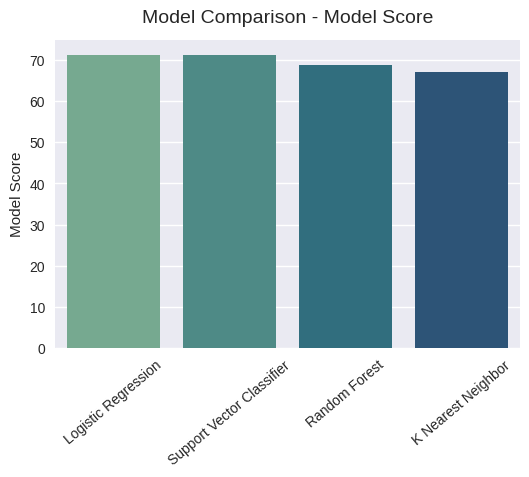

In [ ]:
plt.style.use("seaborn")

x = ["Logistic Regression",
     "Support Vector Classifier",
     "Random Forest",
     "K Nearest Neighbor"]

y = [score_logreg,
     score_SVC,
     score_rfc,
     score_knn]

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Score")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Score", fontsize=14, y=1.03);